In [43]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import EqualFrequencyDiscretiser
from sklearn.preprocessing import LabelEncoder

# A. Nonlinear Transformation

In [44]:
df = pd.read_csv('1_china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [45]:
x = df['Year']
y = df['Value']

y_log = np.log(y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y_log)

y_pred = np.exp(slope * x + intercept)

r2 = r2_score(y, y_pred)
print(f"The coefficient of determination or r squared is {r2}")

The coefficient of determination or r squared is 0.7663622396055385


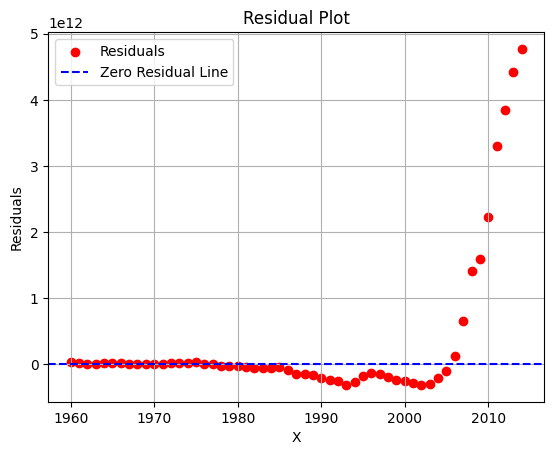

In [46]:
residual = y - y_pred

plt.scatter(x, residual, c='red', label='Residuals')
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Residual Line')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# B. Categorical Encoding

In [47]:
df = pd.read_csv('2_melb_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [48]:
le = LabelEncoder()

df['Method'] = le.fit_transform(df['Method'])
df['CouncilArea'] = le.fit_transform(df['CouncilArea'])
df['Regionname'] = le.fit_transform(df['Regionname'])

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,1,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,31,-37.7996,144.9984,2,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,1,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,3,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,0,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,31,-37.7969,144.9969,2,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,4,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,31,-37.8072,144.9941,2,4019.0


# C. Discretization

In [49]:
df =  pd.read_csv('3_train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [50]:
continuous_variables = df.describe().columns.tolist()

X = df[continuous_variables]
y = df['Transported']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.fillna(X_train.median(),inplace=True)
X_test.fillna(X_train.median(),inplace=True)
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
4278,54.0,0.0,559.0,0.0,15238.0,2799.0
5971,20.0,0.0,20.0,1.0,696.0,0.0
464,43.0,1821.0,0.0,47.0,29.0,0.0
4475,24.0,185.0,0.0,476.0,1810.0,53.0
8469,25.0,0.0,0.0,0.0,0.0,0.0


In [52]:
equal_frequency_discretizer = EqualFrequencyDiscretiser(q=10, variables=['FoodCourt'])

X_train = equal_frequency_discretizer.fit_transform(X_train)
X_test = equal_frequency_discretizer.fit_transform(X_test)
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
4278,54.0,0.0,2,0.0,15238.0,2799.0
5971,20.0,0.0,1,1.0,696.0,0.0
464,43.0,1821.0,0,47.0,29.0,0.0
4475,24.0,185.0,0,476.0,1810.0,53.0
8469,25.0,0.0,0,0.0,0.0,0.0


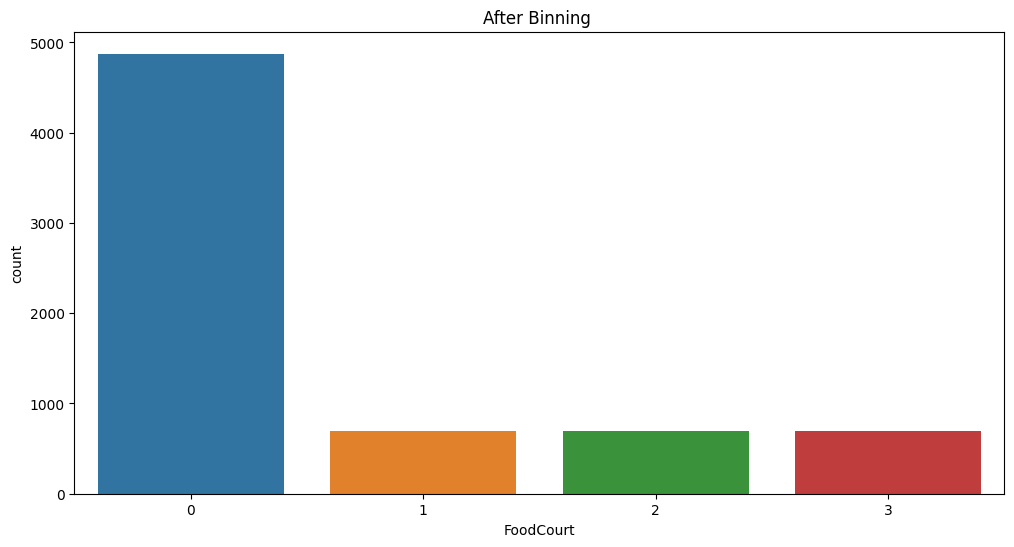

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x=X_train['FoodCourt'])
plt.title("After Binning ")
plt.show()